<div style="text-align: right"><b> Ana Valentina López Chacón & Sara Julieth Zuleta Quevedo. </b></div>

# **Proyecto II: Segmentación Morfológica**

En este proyecto la idea es desarrollar un algoritmo, utilizando lo que saben hasta el momento, que permita segmentar la imagen de la célula de planta que se muestra abajo en regiones que representen diferente granulación. La imagen la pueden encontrar en la carpeta img. Deben entregar lo siguiente:
1. Una descripción del algoritmo a utilizar.
2. Notebook con la implementación del algoritmo, y uan descripcion paso a paso del proceso realizado y discución de los resultados de cada paso.
3. La imagen segmentada en varias dregiones.
4. Una discución de los resultados obtenidos y posibles mejoras que se pueden realizar.

No estan obligados a utilizar solamente las operaciones morfologicas vistas en clase, pero si deben implementar todas las operaciones desdee cero, es decir deben implementar dilataciones, erosiones, etc...

Para el desarrollo de este proyecto deben hacer se en grupos de 2 personas, admito un grupo de 3. Recuerden la condicion de no repetir grupo. La entrega se debe realizar el día **Viernes 1 de Abril a las 11:59 p.m.**

*Nota: Recuerden discutir bastante cada uno de los pasos y el algoritmo, al no haber preguntas la mayor parte de la nota se centrara en las discuiones que ustedes hagan de los pasos del algoritmo y resultados. La nota será dividida de la siguiente forma 25% funcionamiento, 25% descripción propuesta seleccionada (debe ser tecnicamente correcta), 25% implementación, 25% discusion final de los resultados y posibles mejoras** 

La imagen a procesar es la siguiente:



<div>
<img src="img/Planta_celula.png" width="300"/>
</div>


# **Implementación**

Se importan las librerías necesarias para el desarrollo del proyecto.

In [1]:
import cv2
import numpy as np
from skimage.util.shape import view_as_windows
import matplotlib.pyplot as plt 

Se lee la imagen seleccionada con el fin de realizar la segmentación. Además, para obtener una mejor visualización, dado que es una imagen en escala de grises y solo tiene una dimensión, se emplea `matplotlib.pyplot` con un mapa de color en `gray`.

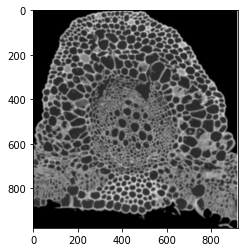

In [2]:
im = cv2.imread("planta_celula.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(im, cmap="gray")

Se disminuye el tamaño de la imagen con el propósito de facilitar los cálculos y optimizar los recursos computacionales, principalmente, que no tome mucho tiempo.

In [3]:
im.shape

(978, 922)

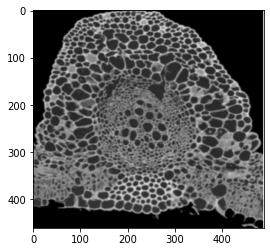

In [4]:
im_new = cv2.resize(im, (im.shape[0]//2, im.shape[1]//2))
plt.imshow(im_new, cmap="gray")

Se implementa el algoritmo de erosión para imágenes en escala de grises. Esta función fue tomada del taller 4 realizado previamente en conjunto con **Isabella Martínez**.

In [5]:
def erosion(image, kernel, opt = 0):
    num = kernel.shape[0]//2
    if opt == 0:
      im_padded = cv2.copyMakeBorder(image.copy(), num, num, num, num, cv2.BORDER_CONSTANT, value=[0,0,0])
    elif opt == 1:
      im_padded = cv2.copyMakeBorder(image.copy(), num, num, num, num, cv2.BORDER_REFLECT)
    else:
      print("invalid value")
      return
    output_shape_x = (im_padded.shape[0] - kernel.shape[0]) + 1
    output_shape_y = (im_padded.shape[1] - kernel.shape[1]) + 1
    if len(image.shape) == 2:
        windows = view_as_windows(im_padded, kernel.shape)
        wind_mat = windows.reshape(output_shape_x*output_shape_y, kernel.shape[0]*kernel.shape[1]).T
        idxs = np.where(kernel.flatten() == 1)[0]
        out = np.min(wind_mat[idxs,:], axis = 0)
        result = out.reshape(output_shape_x, output_shape_y)
        return result
    elif len(image.shape) == 3:
        list_matrix = []
        for d in range(3):
            windows = view_as_windows(im_padded[:, :, d], kernel.shape)
            wind_mat = windows.reshape(output_shape_x*output_shape_y, kernel.shape[0]*kernel.shape[1]).T
            idxs = np.where(kernel.flatten() == 1)[0]
            out = np.min(wind_mat[idxs,:], axis = 0)
            result = out.reshape(output_shape_x, output_shape_y)
            list_matrix.append(result)
        return np.dstack((list_matrix[0], list_matrix[1], list_matrix[2]))

De igual forma, se implementa el algoritmo de dilatación para las imágenes y este código también fue tomado del taller 4.

In [6]:
def dilatation(image, kernel, opt = 0):
    num = kernel.shape[0]//2
    if opt == 0:
      im_padded = cv2.copyMakeBorder(image.copy(), num, num, num, num, cv2.BORDER_CONSTANT, value=[0,0,0])
    elif opt == 1:
      im_padded = cv2.copyMakeBorder(image.copy(), num, num, num, num, cv2.BORDER_REFLECT)
    else:
      print("invalid value")
      return
    im_padded = cv2.copyMakeBorder(image.copy(), num, num, num, num, cv2.BORDER_CONSTANT, value=[0,0,0])
    output_shape_x = (im_padded.shape[0] - kernel.shape[0]) + 1
    output_shape_y = (im_padded.shape[1] - kernel.shape[1]) + 1
    if len(image.shape) == 2:
        windows = view_as_windows(im_padded, kernel.shape)
        wind_mat = windows.reshape(output_shape_x*output_shape_y, kernel.shape[0]*kernel.shape[1]).T
        idxs = np.where(kernel.flatten() == 1)[0]
        out = np.max(wind_mat[idxs,:], axis = 0)
        result = out.reshape(output_shape_x, output_shape_y)
        return result
    elif len(image.shape) == 3:
        list_matrix = []
        for d in range(3):
            windows = view_as_windows(im_padded[:, :, d], kernel.shape)
            wind_mat = windows.reshape(output_shape_x*output_shape_y, kernel.shape[0]*kernel.shape[1]).T
            idxs = np.where(kernel.flatten() == 1)[0]
            out = np.max(wind_mat[idxs,:], axis = 0)
            result = out.reshape(output_shape_x, output_shape_y)
            list_matrix.append(result)
        return np.dstack((list_matrix[0], list_matrix[1], list_matrix[2]))

Ahora bien, se implementan como funciones los algoritmos de closing y opening con el fin de facilitar su uso a lo largo de la implementación. En el closing, se ilustran las partes que contienen el *kernel* o elemento estructural.

In [7]:
def closing(im, kernel):
    return dilatation(erosion(im, kernel, 1), kernel, 1)

En el opening, para una imagen blanca con fondo negro, el resultado que retorna es la unión de todas las secciones que contienen el elemento estructural.

In [8]:
def opening(im, kernel):
    return erosion(dilatation(im, kernel, 1), kernel, 1)

Luego, se convierte la imagen en una imagen binaria mediante la librería `OpenCV` con el fin de realizar una distinción más fuerte entre el objeto y su fondo para así realizar la segmentación de sus partes blancas y los orificios negros presentados en la imagen.

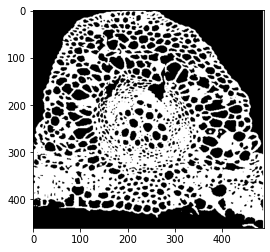

In [9]:
res, im_res = cv2.threshold(im_new, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(im_res, cmap="gray")

## **Segmentación de las partes de color blanco**

Se consideran las partes blancas de la imagen binaria. Podemos ver como la parte blanca actúa como un fondo o contorno para los orificios negros, sin embargo, existen secciones en donde la parte clara es considerable. La idea es dividir las secciones de este color al realizar en primer lugar un closing con cierto *kernel* y luego un opening con un kernel de mayor tamaño. Esto permite obtener las partes predominantes mediante el closing y obtener su unión final con el opening.

Se segmenta en tres categorías: 
1. Grande, con *kernels* de tamaños 19 y 17.
2. Mediano, con *kernels* de tamaños 13 y 11.
3. Pequeño, con *kernels* de tamaños 7 y 5.

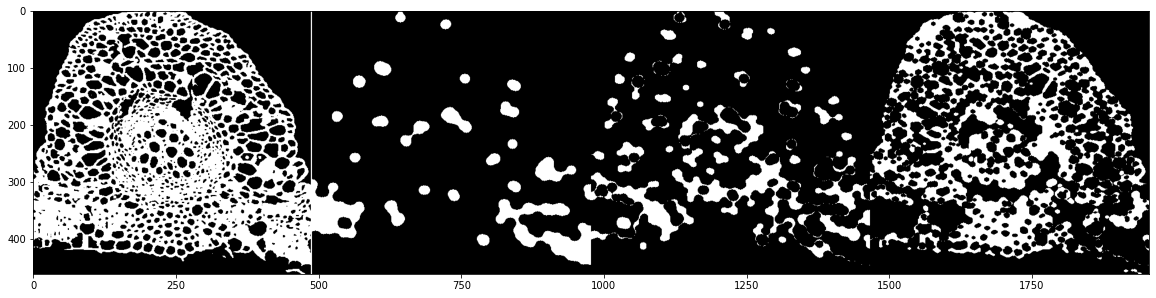

In [10]:
whites = []

for q in range(3):
    i = 19 - 6*q
    k1 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (i-2,i-2))
    k2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (i,i))

    c_1 = closing(im_res, k1)
    o_1 = opening(c_1, k2)
    whites.append(o_1)

all_figs = np.hstack((im_res, whites[0], cv2.bitwise_xor(whites[0], whites[1]), cv2.bitwise_xor(whites[1], whites[2])))
plt.figure(figsize = (20,100))
plt.imshow(all_figs, cmap = "gray")

Es posible observar a partir de la imagen anterior como se agruparon las secciones en las categorías deseadas, además, dado que se trabaja con las partes blancas, es posible visualizar únicamente los pedazos que corresponden a cada categoría sin sobreponerse entre ellas. Finalmente se asigna un degrade de colores azules que van desde el más claro al más oscuro representando del más grande al más pequeño, respectivamente.


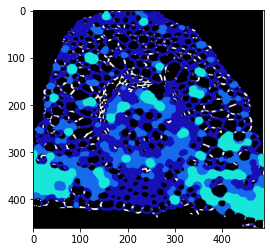

In [11]:
rgb_white = np.dstack((im_res, im_res, im_res))
colors_1 = [[23, 230, 216], [21, 107, 235], [22, 16, 181]]
for q in reversed(range(len(whites))):
    im = whites[q]
    rgb_white[np.where(im==255)] = colors_1[q]

plt.imshow(rgb_white)

## **Segmentación de las partes de color negro**

Se consideran las partes negras de la imagen binaria. Idealmente, se busca realizar la operación contraria al proceso anterior, es decir, un opening con cierto *kernel* y luego, un closing con un *kernel* de mayor tamaño. Sin embargo, dado que el fondo es del mismo color que la región que se busca segmentar, la visualización y asignación de colores se realiza de forma diferente. Podemos ver como los orificios más cercanos presentan un nexo que los une en las primeras imágenes, esto se debe a realizar el opening en primer lugar ya que, posiblemente, la unión de los pedazos grandes se sobrepone en las partes más pequeños que ocupan esta parte, pero a medida que se disminuye el tamaño del *kernel* podemos ver con mayor detalle y precisión las secciones deseadas.

Como la muestra presenta gran variedad de tamaños y formas se optó por realizar la segmentación en 5 categorías:

1. Muy grande, con *kernels* de tamaños 19 y 17.
2. Grande, con *kernels* de tamaños 15 y 13.
3. Mediano, con *kernels* de tamaños 11 y 9.
4. Pequeño, con *kernels* de tamaños 7 y 5.
5. Muy pequeño, con *kernels* de tamaños 3 y 1.

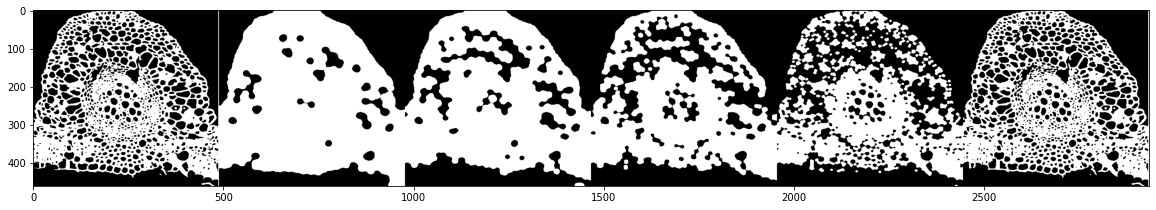

In [12]:
blacks = []

for q in range(5):
    i = 19 - 4*q
    k1 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (i-2,i-2))
    k2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (i,i))

    o_1 = opening(im_res, k1)
    c_1 = closing(o_1, k2)
    blacks.append(c_1)

all_figs = np.hstack((im_res, blacks[0], blacks[1], blacks[2], blacks[3], blacks[4]))
plt.figure(figsize = (20,100))
plt.imshow(all_figs, cmap = "gray")

Es posible observar la adición de cada una de las categorías mencionadas en las imágenes presentadas. Luego, se procede a asignar un color a cada uno de los segmentos obtenidos, con el fin de obtener mayor visibilidad se tomaron colores que destacaran tomando en consideración las tonalidades de azules determinadas en la sección anterior. 

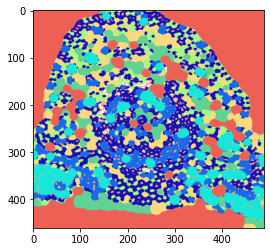

In [13]:
# rgb_black = np.dstack((im_res, im_res, im_res))
rgb_black = rgb_white
colors_2 = [[238, 96, 85], [96, 211, 148], [255, 217, 125], [170, 246, 131], [255, 155, 133]]
for q in reversed(range(len(blacks))):
    im = blacks[q]
    rgb_black[np.where(im==0)] = colors_2[q]

plt.imshow(rgb_black)

Sin embargo, ocurre un inconveniente con respecto al fondo que ya se había mencionado y es que este adopta el color de la primera categoría, esto sucede por la forma en la que se está pintando. Con el propósito de devolver la imagen con su color de fondo original, se emplea la función `floodFill` de la librería `OpenCV`, con una tolerancia de 25 y se procede a rellenar el fondo para esta imagen en particular, pero la automatización para que este proceso se pueda realizar de forma general también es posible y sencillo.

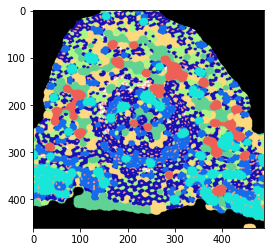

In [14]:
src = rgb_black
points = [(0,0), (src.shape[1]-1,0), (0,src.shape[0]-1), (src.shape[1]-1,src.shape[0]-1)]
lista = []

for q in range(4):
    tolerancia = 25
    point = points[q]

    connectivity = 4
    flags = connectivity
    flags |= cv2.FLOODFILL_FIXED_RANGE

    new_im = cv2.floodFill(src, None, point, (0, 0, 0), (tolerancia,) * 3, (tolerancia,) * 3, flags)
    lista.append(new_im[1])
    
plt.imshow(lista[1])

Finalmente, se puede observar el resultado de la segmentación para cada categoría definida con su tonalidad respectiva.

## **Discusión y posibles mejoras**

- El propósito inicial de este proyecto se basaba en segmentar una imagen a través de diferentes texturas, mediante algoritmos de procesamientos de imágenes sobre operaciones morfológicas, tales como: closing, opening, erosión, dilatación, entre otros. Con el fin de lograr este objetivo, se implementaron los métodos para realizar cada una de estas operaciones y tomando como referencia esta imagen en particular, se segmentaron las partes blancas de la célula y cada uno de sus orificios en diferentes categorías dependiendo de su tamaño. Al tener estas divisiones estipuladas, se asignó un color diferente a cada una de las regiones segmentadas para poder visualizar con mayor claridad la diferencia de sus texturas. El resultado obtenido para esta imagen en particular es bastante satisfactorio dado que permite evidenciar la diferencia de cada una de sus capas de forma apropiada y palpable.

- A pesar de que la implementación ofrece un resultado satisfactorio y en general cumple con el propósito inicial, existen maneras de optimar mucho más el proceso. En primer lugar, es posible agregar mayor precisión, es decir, generar más categorías y explorar otras dimensiones de elementos estructurales que puedan aportar más información al algoritmo. De igual forma, se puede automatizar de forma que detecte el color del fondo y las secciones que desea segmentar a partir de cualquier imagen inicial y con base en esta información proceda a realizar el procedimiento necesario, ya sea un closing y luego un opening o viceversa. Finalmente, tomando como referencia el ejemplo presentado y en general cualquier imagen que presente tonos negros en su fondo y dentro de la figura que se desea segmentar, se puede generalizar el método para que cambie el color del fondo interna o directamente no lo considere, esto se puede lograr definiendo un `ClickEvent` que rellene la sección seleccionada o detectando inicialmente el fondo y descartándolo con algún valor particular en la matriz asociada.


<div style="text-align: right"><b> Ana Valentina López Chacón & Sara Julieth Zuleta Quevedo. </b></div>